# Welcome to the Electric Vehicle Population Dataset Analysis!

## Here are 8 questions that we want to know the answer to:

<ul>
<li>1. What is the distribution of electric vehicles by state? Which states have the highest EV adoption?</li>
<li>2. How has the growth of electric vehicles changed over the years based on the Model Year data?</li>
<li>3. What are the most popular EV makes and models in the dataset?</li>
<li>4. Is there a correlation between electric range and the vehicle's popularity?</li>
<li>5. What percentage of vehicles in the dataset qualify as Clean Alternative Fuel Vehicles (CAFV)?</li>
<li>6. Which manufacturers produce EVs with the longest range?</li>
<li>7. How has the market share of different EV manufacturers changed from 2013 to 2023?</li>
<li>8. Is there evidence of increasing electric range in newer model years?</li>
</ul>

<p>Please take a look below at each question and graph along with it to get the answers!</p>

# Setup

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 

# Load the dataset
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')



# Clean the data

In [105]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
df = df.dropna()

# Remove rows where Electric Range is 0
df = df[df['Electric Range'] > 0]

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicates (if any)
df = df.drop_duplicates()

# Convert relevant columns to appropriate data types (if necessary)
df['Model Year'] = df['Model Year'].astype(int)
df['Electric Range'] = df['Electric Range'].astype(float)


Missing values in each column:
 VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5

# Display the cleaned Data:

In [106]:
# Display the cleaned dataset
df.head(10)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0,14.0,150126840,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10
8,1N4AZ0CP8F,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0,26.0,137322111,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10
9,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0,47.0,240226332,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
10,5YJYGDEEXL,King,Seattle,WA,98144.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0,37.0,113323024,POINT (-122.30823 47.581975),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
11,WBY8P8C53K,Kitsap,Bainbridge Island,WA,98110.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0,23.0,228846642,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10


# Aggregations

In [107]:
# Average electric range by make
average_range_by_make = df.groupby('Make')['Electric Range'].mean().reset_index()
average_range_by_make.columns = ['Make', 'Average Electric Range']

# Sort by highest average electric range
average_range_by_make_sorted = average_range_by_make.sort_values(by='Average Electric Range', ascending=False)

# Display the sorted results
print("Average Electric Range by Make (Sorted):\n", average_range_by_make_sorted)



Average Electric Range by Make (Sorted):
                     Make  Average Electric Range
29                 TESLA              240.837346
14                JAGUAR              234.000000
25              POLESTAR              233.000000
6              CHEVROLET              138.293746
32            VOLKSWAGEN              107.529577
24                NISSAN              104.322563
34  WHEEGO ELECTRIC CARS              100.000000
30                 TH!NK              100.000000
13               HYUNDAI               92.808279
16                   KIA               86.441230
1                   AUDI               86.074641
9                   FIAT               85.645408
26               PORSCHE               71.748242
27                 SMART               62.325926
2         AZURE DYNAMICS               56.000000
22                  MINI               47.307018
4                    BMW               46.827057
12                 HONDA               46.599278
18                 LEXUS   

# Aggregations

In [108]:
# Total number of vehicles by make
total_vehicles_by_make = df['Make'].value_counts().reset_index()
total_vehicles_by_make.columns = ['Make', 'Total Vehicles']

# Sort by highest total number of vehicles
total_vehicles_by_make_sorted = total_vehicles_by_make.sort_values(by='Total Vehicles', ascending=False)

# Display the sorted results
print("\nTotal Vehicles by Make (Sorted):\n", total_vehicles_by_make_sorted)



Total Vehicles by Make (Sorted):
                     Make  Total Vehicles
0                  TESLA           25502
1                 NISSAN           10770
2              CHEVROLET            9338
3                 TOYOTA            5972
4                    BMW            5603
5                   JEEP            4468
6                   FORD            3914
7                    KIA            3837
8               CHRYSLER            2976
9                  VOLVO            2705
10                  AUDI            2157
11            VOLKSWAGEN            1065
12            MITSUBISHI             957
13               HYUNDAI             918
14                 HONDA             831
15                  FIAT             784
16               PORSCHE             711
17                 DODGE             568
18                 MAZDA             472
19         MERCEDES-BENZ             445
20                  MINI             342
21                 SMART             270
22               LINCO

# Adding a New Column that categorizes vehicles based on their electric range

In [109]:
# Add a new column for range category
def categorize_range(row):
    if row['Electric Range'] >= 200:
        return 'High Range'
    elif row['Electric Range'] >= 100:
        return 'Medium Range'
    else:
        return 'Low Range'

df['Range Category'] = df.apply(categorize_range, axis=1)

df.head(10)


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract,Range Category
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,High Range
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,High Range
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210.0,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,High Range
5,3FA6P0SU8H,Thurston,Yelm,WA,98597.0,2017,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,21.0,0,2.0,122057736,POINT (-122.61023 46.94126),PUGET SOUND ENERGY INC,5.306701e+10,Low Range
6,1N4AZ0CP2D,Yakima,Yakima,WA,98903.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75.0,0,14.0,150126840,POINT (-120.477805 46.553505),PACIFICORP,5.307700e+10,Low Range
7,KNAGV4LD9J,Snohomish,Bothell,WA,98012.0,2018,KIA,OPTIMA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,29.0,0,1.0,290605598,POINT (-122.1873 47.820245),PUGET SOUND ENERGY INC,5.306105e+10,Low Range
8,1N4AZ0CP8F,Kitsap,Port Orchard,WA,98366.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0,26.0,137322111,POINT (-122.639265 47.5373),PUGET SOUND ENERGY INC,5.303509e+10,Low Range
9,5UXTA6C03N,King,Auburn,WA,98001.0,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0,47.0,240226332,POINT (-122.2849393 47.3384055),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10,Low Range
10,5YJYGDEEXL,King,Seattle,WA,98144.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0,37.0,113323024,POINT (-122.30823 47.581975),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10,High Range
11,WBY8P8C53K,Kitsap,Bainbridge Island,WA,98110.0,2019,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,126.0,0,23.0,228846642,POINT (-122.5235781 47.6293323),PUGET SOUND ENERGY INC,5.303509e+10,Medium Range


# 1. Distribution of Electric Vehicles by State

In [110]:
# Count the number of electric vehicles by state
state_distribution = df['State'].value_counts().reset_index()
state_distribution.columns = ['State', 'Number of EVs']

state_distribution


,State,Number of EVs
0,WA,85683


# 2. States with the Highest EV Adoption

In [111]:
# Get the states with the highest number of electric vehicles
highest_ev_adoption = state_distribution[state_distribution['Number of EVs'] > 0]
highest_ev_adoption

,State,Number of EVs
0,WA,85683


# 3. Growth of Electric Vehicles Over the Years Based on Model Year Data

In [112]:
growth_over_years = df['Model Year'].value_counts().sort_index().reset_index()
growth_over_years.columns = ['Model Year', 'Number of EVs']
growth_over_years




,Model Year,Number of EVs
0,1997,1
1,1998,1
2,1999,5
3,2000,7
4,2002,2
5,2003,1
6,2008,19
7,2010,23
8,2011,775
9,2012,1614


# Chart for Question 3

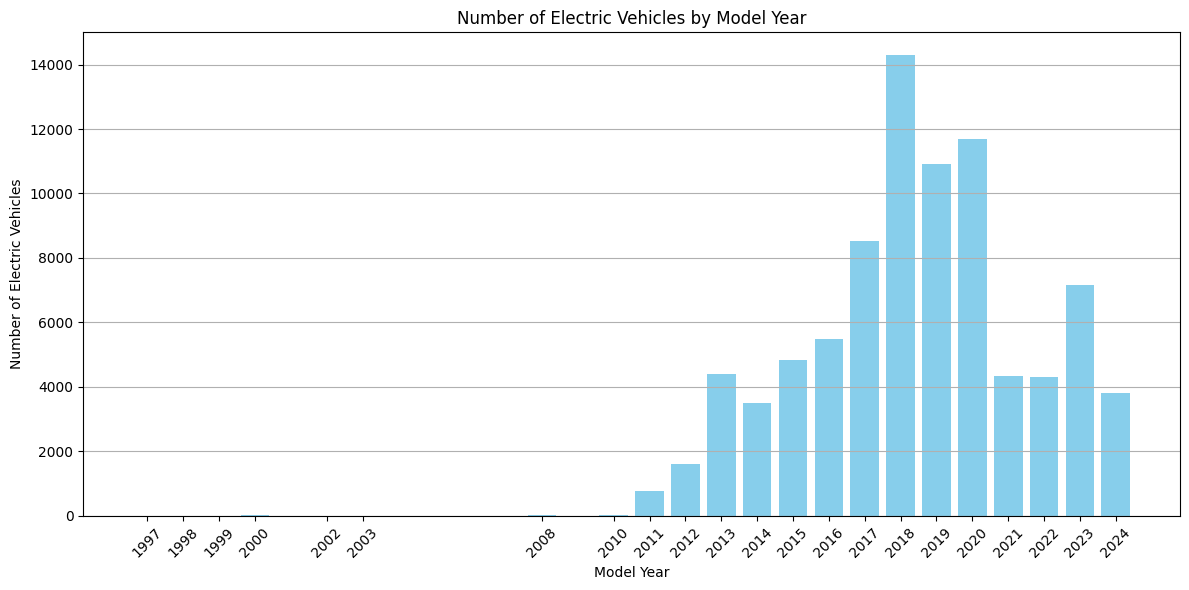

In [113]:
plt.figure(figsize=(12, 6))
plt.bar(growth_over_years['Model Year'], growth_over_years['Number of EVs'], color='skyblue')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Number of Electric Vehicles by Model Year')
plt.xticks(growth_over_years['Model Year'], rotation=45)  
plt.grid(axis='y')
plt.tight_layout() 
plt.show()

# 4. Most Popular EV Makes and Models in the Dataset

In [114]:
popular_makes_models = df.groupby(['Make', 'Model']).size().reset_index(name='Count')
most_popular = popular_makes_models.sort_values(by='Count', ascending=False).reset_index(drop=True)

top_n = 10
top_popular = most_popular.head(top_n)

top_popular




,Make,Model,Count
0,TESLA,MODEL 3,13792
1,NISSAN,LEAF,10770
2,TESLA,MODEL S,6001
3,CHEVROLET,VOLT,4782
4,CHEVROLET,BOLT EV,4315
5,JEEP,WRANGLER,3382
6,TESLA,MODEL X,3294
7,CHRYSLER,PACIFICA,2976
8,TOYOTA,PRIUS PRIME,2725
9,BMW,X5,2407


# Chart for Question 4

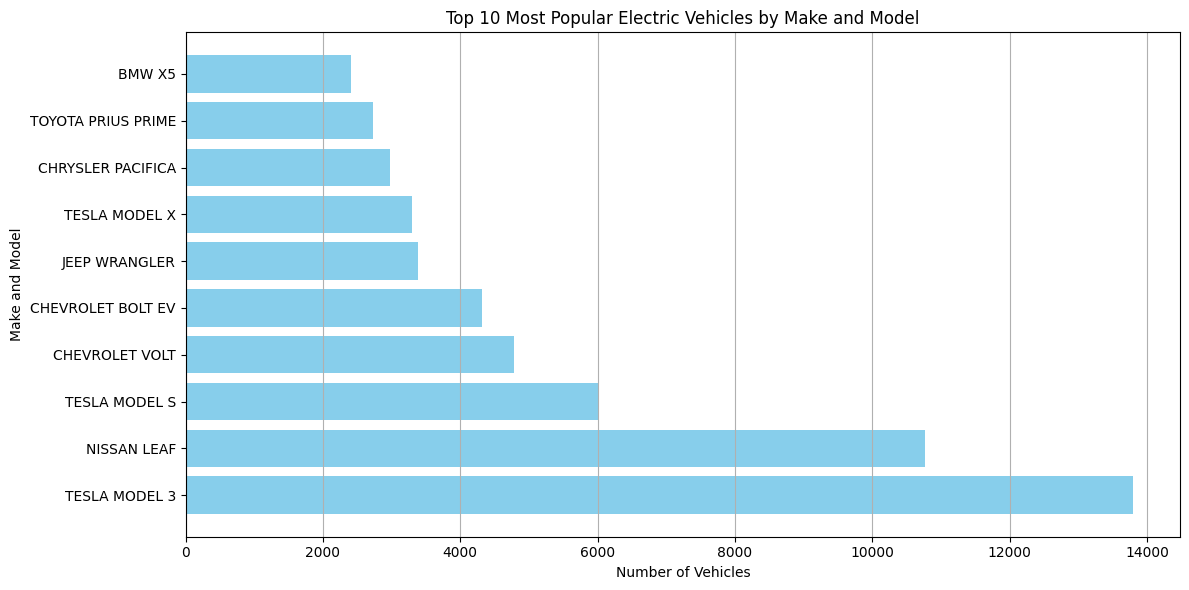

In [115]:
plt.figure(figsize=(12, 6))
plt.barh(top_popular['Make'] + ' ' + top_popular['Model'], top_popular['Count'], color='skyblue')
plt.xlabel('Number of Vehicles')
plt.ylabel('Make and Model')
plt.title(f'Top {top_n} Most Popular Electric Vehicles by Make and Model')
plt.grid(axis='x')
plt.tight_layout() 
plt.show()

# 5. Correlation Between Electric Range and Vehicle's Popularity

In [116]:
popularity_range_correlation = df.groupby('Model')['Electric Range'].mean().reset_index()
popularity_range_correlation['Count'] = df['Model'].value_counts().values
popularity_range_correlation



,Model,Electric Range,Count
0,330E,18.008830,13792
1,500,85.645408,10770
2,530E,15.953431,6001
3,740E,14.000000,4782
4,745E,16.000000,4315
...,...,...,...
90,X3,17.000000,2
91,X5,28.257582,2
92,XC60,25.167917,1
93,XC90,23.208451,1


# Chart for Question 5

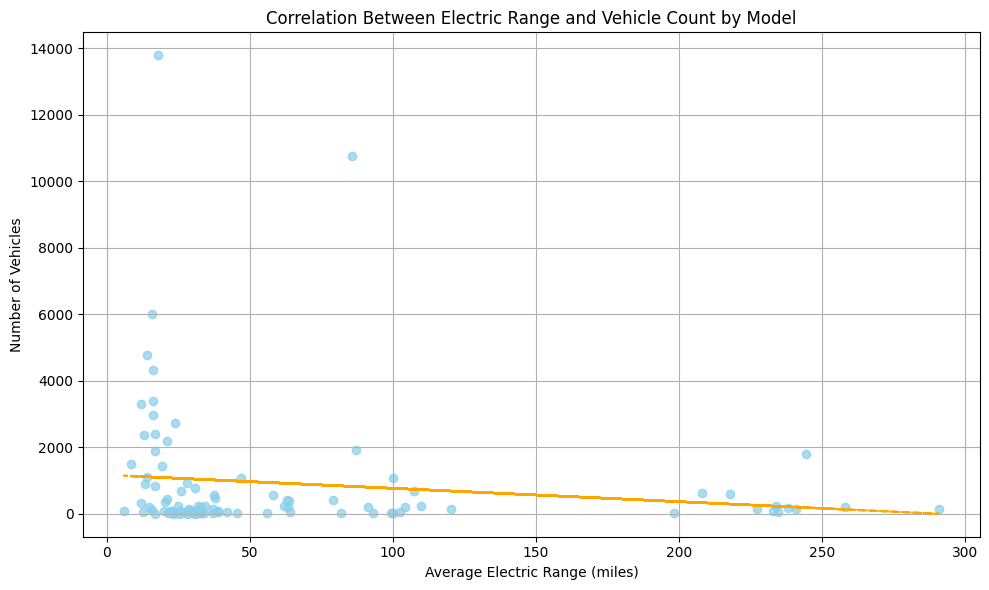

In [117]:
plt.figure(figsize=(10, 6))
plt.scatter(popularity_range_correlation['Electric Range'], popularity_range_correlation['Count'], color='skyblue', alpha=0.7)
plt.title('Correlation Between Electric Range and Vehicle Count by Model')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.grid(True)

z = np.polyfit(popularity_range_correlation['Electric Range'], popularity_range_correlation['Count'], 1)
p = np.poly1d(z)
plt.plot(popularity_range_correlation['Electric Range'], p(popularity_range_correlation['Electric Range']), color='orange', linestyle='--')

plt.tight_layout() 
plt.show()

# 6. Percentage of Vehicles Qualifying as Clean Alternative Fuel Vehicles (CAFV)

In [118]:
cafv_count = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] == 'Clean Alternative Fuel Vehicle Eligible'].shape[0]
total_count = df.shape[0]
cafv_percentage = (cafv_count / total_count) * 100
cafv_percentage


77.22185264288132

# Chart for Question 6

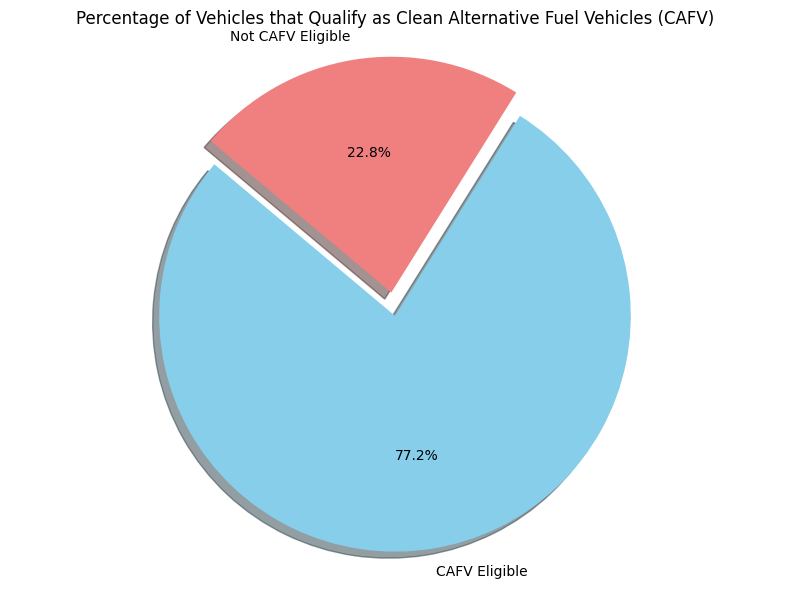

In [119]:
# Create a pie chart
non_cafv_count = total_count - cafv_count
labels = ['CAFV Eligible', 'Not CAFV Eligible']
sizes = [cafv_count, non_cafv_count]
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Vehicles that Qualify as Clean Alternative Fuel Vehicles (CAFV)')
plt.axis('equal')  
plt.tight_layout() 
plt.show()

# 7. Manufacturers Producing EVs with the Longest Range

In [120]:
longest_range_manufacturers = df.groupby('Make')['Electric Range'].mean().sort_values(ascending=False).reset_index()
longest_range_manufacturers.columns = ['Make', 'Average Electric Range']

top_n = 10
top_longest_range = longest_range_manufacturers.head(top_n)

top_longest_range



,Make,Average Electric Range
0,TESLA,240.837346
1,JAGUAR,234.000000
2,POLESTAR,233.000000
3,CHEVROLET,138.293746
4,VOLKSWAGEN,107.529577
5,NISSAN,104.322563
6,WHEEGO ELECTRIC CARS,100.000000
7,TH!NK,100.000000
8,HYUNDAI,92.808279
9,KIA,86.441230


# Chart for Question 7

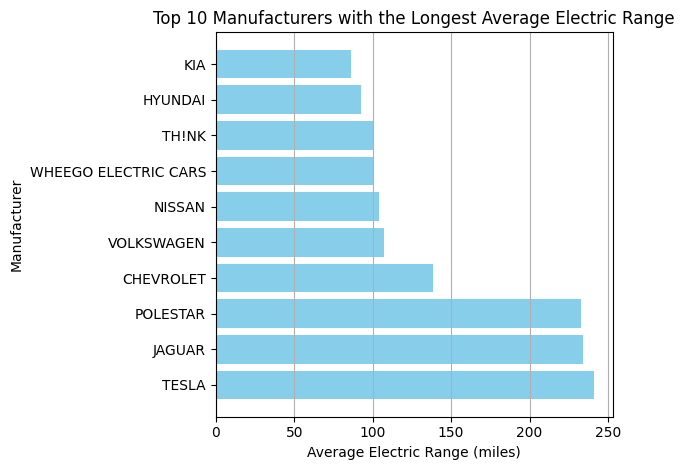

In [121]:
plt.barh(top_longest_range['Make'], top_longest_range['Average Electric Range'], color='skyblue')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Manufacturer')
plt.title(f'Top {top_n} Manufacturers with the Longest Average Electric Range')
plt.grid(axis='x')
plt.tight_layout() 
plt.show()

# 8. Market Share of Different EV Manufacturers (2013 to 2023)

In [122]:
market_share = df[df['Model Year'].between(2013, 2023)]
market_share_counts = market_share['Make'].value_counts(normalize=True) * 100
market_share_df = market_share_counts.reset_index()
market_share_df.columns = ['Make', 'Market Share (%)']

top_n = 10
top_market_share = market_share_df.head(top_n)

market_share_df



,Make,Market Share (%)
0,TESLA,31.887652
1,NISSAN,11.990130
2,CHEVROLET,11.062292
3,TOYOTA,6.483533
4,BMW,6.439470
5,FORD,4.893494
6,KIA,4.648001
7,JEEP,4.417615
8,CHRYSLER,3.616930
9,VOLVO,3.047890


# Chart for Question 8

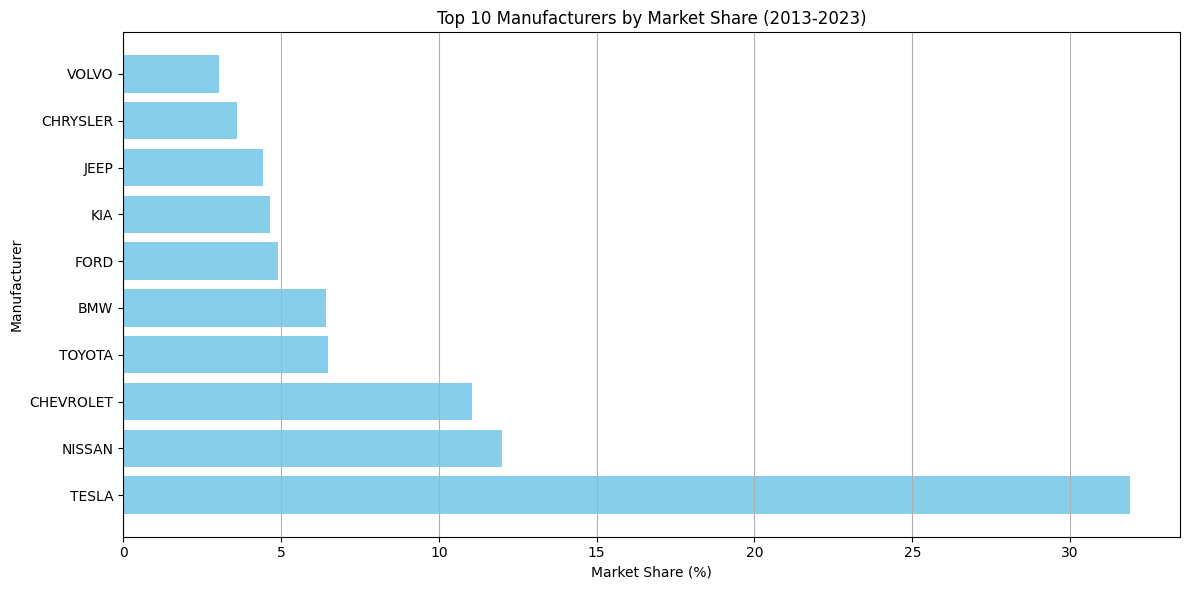

In [123]:
plt.figure(figsize=(12, 6))
plt.barh(top_market_share['Make'], top_market_share['Market Share (%)'], color='skyblue')
plt.xlabel('Market Share (%)')
plt.ylabel('Manufacturer')
plt.title(f'Top {top_n} Manufacturers by Market Share (2013-2023)')
plt.grid(axis='x')
plt.tight_layout()  
plt.show()

# 9. Evidence of Increasing Electric Range in Newer Model Years

In [124]:
average_range_by_year = df.groupby('Model Year')['Electric Range'].mean().reset_index()
average_range_by_year.columns = ['Model Year', 'Average Electric Range']
average_range_by_year


,Model Year,Average Electric Range
0,1997,39.000000
1,1998,58.000000
2,1999,74.000000
3,2000,58.000000
4,2002,95.000000
5,2003,95.000000
6,2008,220.000000
7,2010,226.086957
8,2011,70.891613
9,2012,61.172243


# Chart for question 9

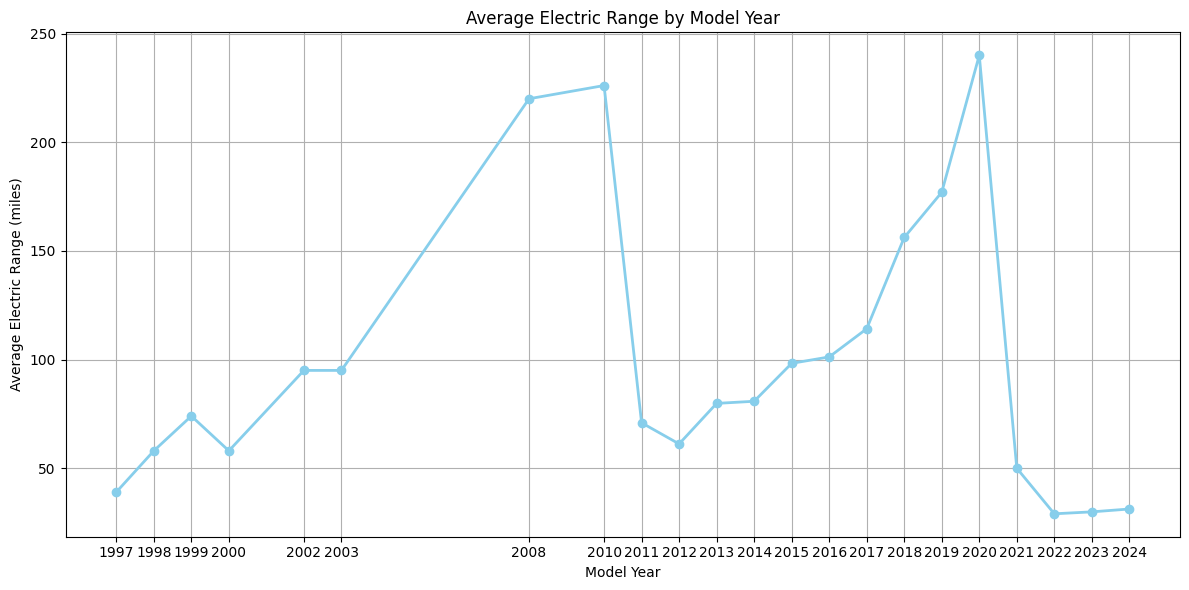

In [125]:
plt.figure(figsize=(12, 6))
plt.plot(average_range_by_year['Model Year'], average_range_by_year['Average Electric Range'], 
         marker='o', color='skyblue', linestyle='-', linewidth=2, markersize=6)
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.xticks(average_range_by_year['Model Year'])  
plt.grid(True)
plt.tight_layout()  
plt.show()